In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/aa-delays-2023.csv"
df = pd.read_csv(path)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              2836 non-null   object 
 1   OP_CARRIER           2836 non-null   object 
 2   OP_CARRIER_FL_NUM    2836 non-null   int64  
 3   ORIGIN               2836 non-null   object 
 4   DEST                 2836 non-null   object 
 5   CRS_DEP_TIME         2836 non-null   int64  
 6   DEP_TIME             2836 non-null   int64  
 7   DEP_DELAY            2836 non-null   int64  
 8   TAXI_OUT             2836 non-null   int64  
 9   WHEELS_OFF           2836 non-null   int64  
 10  WHEELS_ON            2836 non-null   int64  
 11  TAXI_IN              2836 non-null   int64  
 12  CRS_ARR_TIME         2836 non-null   int64  
 13  ARR_TIME             2836 non-null   int64  
 14  ARR_DELAY            2836 non-null   int64  
 15  CANCELLED            2836 non-null   i

In [ ]:
# What types of airports can cause flight delays?
# Airport hub
# Airport used by one or
# more airlines to
# · concentrate and
# · distribute passenger
# traffic and flight
# operations
# Whether arrival or destination is a hub
# How can we test which airport is a hub?
# How can we save the hubs for our model?

# Whether arrival or destination is a hub
# list of hubs
hubs = ['CLT','ORD','DFW','LAX','MIA','JFK','LGA','PHL','PHX','DCA']
is_origin_hub = df['ORIGIN'].isin(hubs)
print("origins that are hubs: ", is_origin_hub)
is_dest_hub = df['DEST'].isin(hubs)
print("Destinations that are hubs: ", is_dest_hub)


origins that are hubs:  0       False
1       False
2       False
3       False
4        True
        ...  
2831    False
2832    False
2833     True
2834    False
2835    False
Name: ORIGIN, Length: 2836, dtype: bool
Destinations that are hubs:  0       False
1       False
2       False
3        True
4       False
        ...  
2831    False
2832    False
2833    False
2834    False
2835    False
Name: DEST, Length: 2836, dtype: bool


In [ ]:
# Get and save hubs
#  set Hubs
# df['ORIGIN_HUB'] = 0: This line creates a new column named 'ORIGIN_HUB' in the DataFrame df and initializes all the values in that column to 0.
df['ORIGIN_HUB'] = 0
# df.loc[is_origin_hub, 'ORIGIN_HUB'] = 1: This line sets the value of 'ORIGIN_HUB' to 1 for rows where the condition is_origin_hub is True.
df.loc[is_origin_hub, 'ORIGIN_HUB'] = 1
df['DEST_HUB'] = 0
df.loc[is_dest_hub, 'DEST_HUB'] = 1

In [ ]:
# How can we check which delays are the airline's responsibility?
print("Delay target features: ", df.loc[df['ARR_DELAY']>15, ['ARR_DELAY', 'WEATHER_DELAY']].head(10))
# · no responsibility: #14,#56,#61,#66
# · partially responsibility: #16,#63
# · almost full or full resposibility: #11,#15,#17,#27

Delay target features:      ARR_DELAY  WEATHER_DELAY
11        129              0
14         73             11
15         55              0
16         25              0
17         29              0
27         27              0
56         26             26
61         75             18
63        124              0
66        291              0


In [ ]:
print("Delay target features: ", df.loc[df['ARR_DELAY']>15, ['ARR_DELAY', 'CARRIER_DELAY']].head(10))

Delay target features:      ARR_DELAY  CARRIER_DELAY
11        129            121
14         73              0
15         55             54
16         25              7
17         29             29
27         27             27
56         26              0
61         75              0
63        124             12
66        291              0


In [ ]:
print("Delay target features: ", df.loc[df['ARR_DELAY']>15, ['ARR_DELAY', 'NAS_DELAY']].head(10))

Delay target features:      ARR_DELAY  NAS_DELAY
11        129          8
14         73          0
15         55          1
16         25          0
17         29          0
27         27          0
56         26          0
61         75          0
63        124          0
66        291        291


In [ ]:
print("Delay target features: ", df.loc[df['ARR_DELAY']>15, ['ARR_DELAY', 'SECURITY_DELAY']].head(10))

Delay target features:      ARR_DELAY  SECURITY_DELAY
11        129               0
14         73               0
15         55               0
16         25               0
17         29               0
27         27               0
56         26               0
61         75               0
63        124               0
66        291               0


In [ ]:
print("Delay target features: ", df.loc[df['ARR_DELAY']>15, ['ARR_DELAY', 'LATE_AIRCRAFT_DELAY']].head(10))

Delay target features:      ARR_DELAY  LATE_AIRCRAFT_DELAY
11        129                    0
14         73                   62
15         55                    0
16         25                   18
17         29                    0
27         27                    0
56         26                    0
61         75                   57
63        124                  112
66        291                    0


In [ ]:
# The airline had to pay for ARR_DELAY
# only has an influence on
# CARRIER_DELAY
# · maintenance or crew problems
# · aircraft cleaning
# · baggage loading
# · fueling

#Only CARRIER_DELAY is the target feature

In [ ]:
from sklearn.model_selection import train_test_split
y = df['CARRIER_DELAY']

# deleting the string data
x = df.drop(['FL_DATE','ARR_DELAY','OP_CARRIER_FL_NUM','FL_DATE', 'ORIGIN','DEST','CANCELLATION_CODE','Unnamed: 27', 'CANCELLED','OP_CARRIER', 'DIVERTED'], axis=1)

# Correlation between features
# Examine how linear correlated are the features to the
# target
corr=x.corr()
print(abs(corr['CARRIER_DELAY'].sort_values(ascending=False)))

# drop the target
x = df.drop(['CARRIER_DELAY'], axis=1) # target variable

# split the model into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=9)



CARRIER_DELAY          1.000000
DEP_DELAY              0.627788
LATE_AIRCRAFT_DELAY    0.078805
WEATHER_DELAY          0.044422
NAS_DELAY              0.043679
TAXI_OUT               0.041070
TAXI_IN                0.031730
WHEELS_OFF             0.029727
DEP_TIME               0.023325
SECURITY_DELAY         0.004164
WHEELS_ON              0.009379
ARR_TIME               0.012456
CRS_ARR_TIME           0.012591
DEST_HUB               0.014696
ACTUAL_ELAPSED_TIME    0.025846
CRS_ELAPSED_TIME       0.032793
AIR_TIME               0.033050
ORIGIN_HUB             0.033956
CRS_DEP_TIME           0.036349
DISTANCE               0.040080
Name: CARRIER_DELAY, dtype: float64


In [ ]:
# set y to 1 (delay >15 minutes) or 0
y_train_class = y_train.apply(lambda x:1 if x>15 else 0)
y_test_class = y_test.apply(lambda x:1 if x>15 else 0)


Kolmogorov-Smirnov test statistic: 0.6872498680518208
p-value: 1.5463486094080722e-47


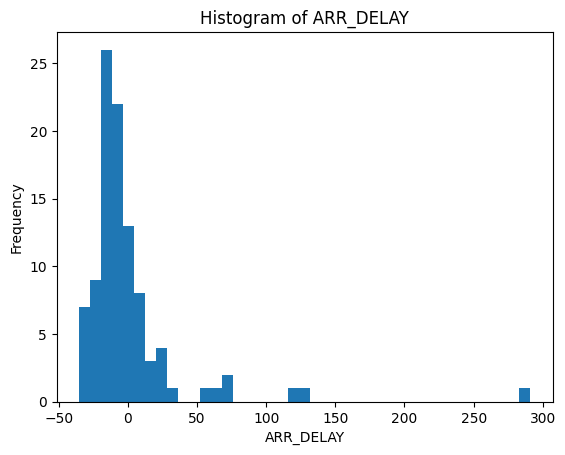

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
data_subset = df['ARR_DELAY'].head(100).dropna()
# Plot histogram
ks_stat, p_value = stats.kstest(data_subset, 'norm')
print("Kolmogorov-Smirnov test statistic:", ks_stat)
print("p-value:", p_value)

# Create a histogram of the data
plt.hist(data_subset, bins='auto')
plt.xlabel('ARR_DELAY')
plt.ylabel('Frequency')
plt.title('Histogram of ARR_DELAY')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Kolmogorov-Smirnov test statistic: nan
p-value: nan


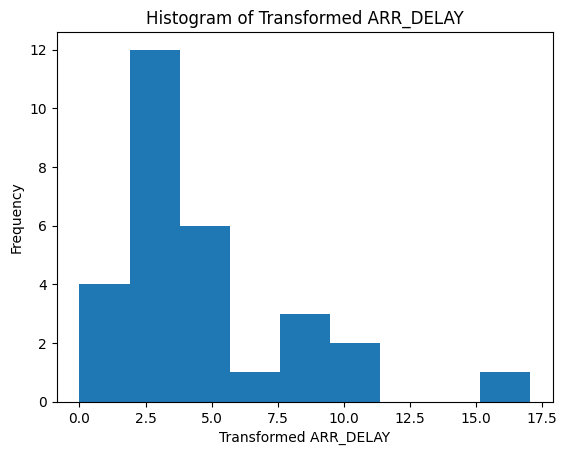

In [ ]:
# Apply a nonlinear transformation (e.g., square root) to the data
transformed_data = np.sqrt(data_subset)

# Test for normality using the Kolmogorov-Smirnov test
ks_stat, p_value = stats.kstest(transformed_data, 'norm')
print("Kolmogorov-Smirnov test statistic:", ks_stat)
print("p-value:", p_value)

# Create a histogram of the transformed data
plt.hist(transformed_data, bins='auto')
plt.xlabel('Transformed ARR_DELAY')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed ARR_DELAY')
plt.show()

Kolmogorov-Smirnov test statistic: 0.8813503964748575
p-value: 6.012476585530383e-93


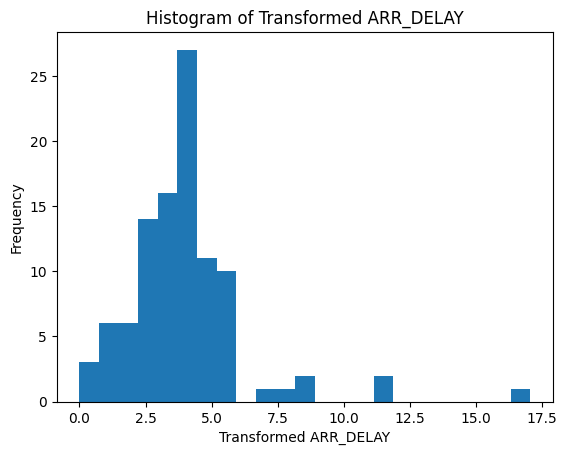

In [ ]:
# The RuntimeWarning you're encountering is due to the fact that you're taking the square root of negative values in the data.
# The square root of a negative number is undefined in the real number system, so it results in the special value "NaN" (not a number).
absolute_value = np.abs(data_subset)

# Apply a nonlinear transformation (e.g., square root) to the data
transformed_data = np.sqrt(absolute_value)

# Test for normality using the Kolmogorov-Smirnov test
ks_stat, p_value = stats.kstest(transformed_data, 'norm')
print("Kolmogorov-Smirnov test statistic:", ks_stat)
print("p-value:", p_value)

# Create a histogram of the transformed data
plt.hist(transformed_data, bins='auto')
plt.xlabel('Transformed ARR_DELAY')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed ARR_DELAY')
plt.show()


In [ ]:
#  Use a decision tree for prediction.
from sklearn.tree import DecisionTreeClassifier
# Create and train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5)

x_train = x_train.drop(['FL_DATE','ARR_DELAY', 'OP_CARRIER_FL_NUM', 'ORIGIN','DEST','CANCELLATION_CODE','Unnamed: 27', 'CANCELLED','OP_CARRIER', 'DIVERTED'], axis=1)
x_test = x_test.drop(['FL_DATE','ARR_DELAY', 'OP_CARRIER_FL_NUM', 'ORIGIN','DEST','CANCELLATION_CODE','Unnamed: 27', 'CANCELLED','OP_CARRIER', 'DIVERTED'], axis=1)

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(x_test)

In [ ]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8873239436619719


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate mean squared error

# The mean squared error (MSE) tells you how close a regression line is to a set of points.
# It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
# The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.
# It’s called the mean squared error as you’re finding the average of a set of errors.
# The lower the MSE, the better the forecast.

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R2 score
# (coefficient of determination) regression score function.

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 693.6830985915493
R2 Score: -0.019563823368650146


In [ ]:
from sklearn.neural_network import MLPRegressor
# Create an instance of MLPRegressor
mlp_model = MLPRegressor(max_iter=500)

In [ ]:
# Train the model
mlp_model.fit(x_train, y_train)

MLPRegressor(max_iter=500)

In [ ]:
# Make predictions on the test data
y_pred = mlp_model.predict(x_test)

In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print results
print("Model: MLPRegressor")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Model: MLPRegressor
Mean Squared Error: 111.46251895592867
R2 Score: 0.8361742527391142


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create instances of the models
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(max_depth=5)
mlp_model = MLPRegressor(max_iter=500)

# Dictionary of models
models = {
    'Linear Regression': linear_regression_model,
    'Decision Tree': decision_tree_model,
    'MLP': mlp_model
}


In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on training data
    y_train_pred = model.predict(x_train)

    # Make predictions on test data
    y_test_pred = model.predict(x_test)

    # Calculate RMSE for training data

    # What is Root Mean Square Error (RMSE)?
    # Root mean square error or root mean square deviation is one of the most commonly used measures
    # for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

    # Calculate RMSE for test data
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # Calculate R2 score for test data
    r2_test = r2_score(y_test, y_test_pred)

    # Dataframe to store results
    results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Classification Report'])

    # Append results to the dataframe
    results_df = results_df.append({
        'Model': model_name,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Score Test': r2_test
    }, ignore_index=True)

<ipython-input-22-172fd0b7c120>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-22-172fd0b7c120>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-22-172fd0b7c120>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
# Display results as an HTML table
html_table = results_df.to_html(index=False)
print(html_table)
# import pandas as pd
# reg_metrics = pd.DataFrame.from_dict(models, "index")[['Model', 'Accuracy', 'Classification Report']]
# print(reg_metrics)


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Model</th>
      <th>Accuracy</th>
      <th>Classification Report</th>
      <th>RMSE Train</th>
      <th>RMSE Test</th>
      <th>R2 Score Test</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>MLP</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>7.778249</td>
      <td>12.552254</td>
      <td>0.768422</td>
    </tr>
  </tbody>
</table>


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logistic_model = LogisticRegression(random_state=9)
logistic_model.fit(x_train, y_train_class)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=9)
tree_model.fit(x_train, y_train_class)

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=9)
gradient_boosting_model.fit(x_train, y_train_class)

# Predictions on the test set
logistic_preds = logistic_model.predict(x_test)
tree_preds = tree_model.predict(x_test)
gradient_boosting_preds = gradient_boosting_model.predict(x_test)

# Evaluate the models
models = {'Logistic Regression': logistic_preds, 'Decision Tree': tree_preds, 'Gradient Boosting': gradient_boosting_preds}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test_class, predictions)
    print(f"\n{model_name}:\n")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, predictions))
    print("Classification Report:")
    print(classification_report(y_test_class, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:

Accuracy: 0.9812
Confusion Matrix:
[[392   4]
 [  4  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       396
           1       0.87      0.87      0.87        30

    accuracy                           0.98       426
   macro avg       0.93      0.93      0.93       426
weighted avg       0.98      0.98      0.98       426


Decision Tree:

Accuracy: 0.9531
Confusion Matrix:
[[384  12]
 [  8  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       396
           1       0.65      0.73      0.69        30

    accuracy                           0.95       426
   macro avg       0.81      0.85      0.83       426
weighted avg       0.96      0.95      0.95       426


Gradient Boosting:

Accuracy: 0.9718
Confusion Matrix:
[[389   7]
 [  5  25]]
Classification Report:
              precision    recall  f1-scor


Logistic Regression:

AUC: 0.9614
Recall: 0.8667
F1 Score: 0.8667


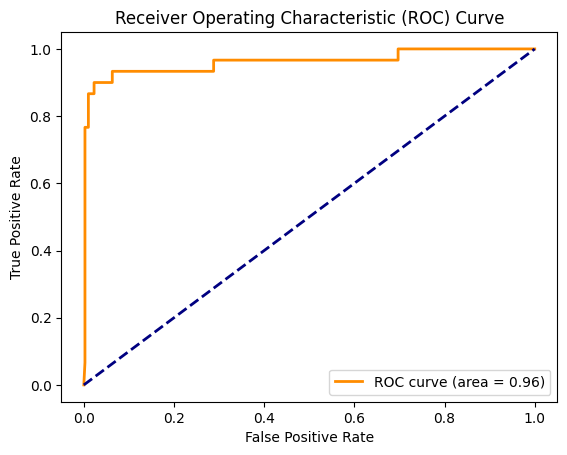


Decision Tree:

AUC: 0.8515
Recall: 0.7333
F1 Score: 0.6875


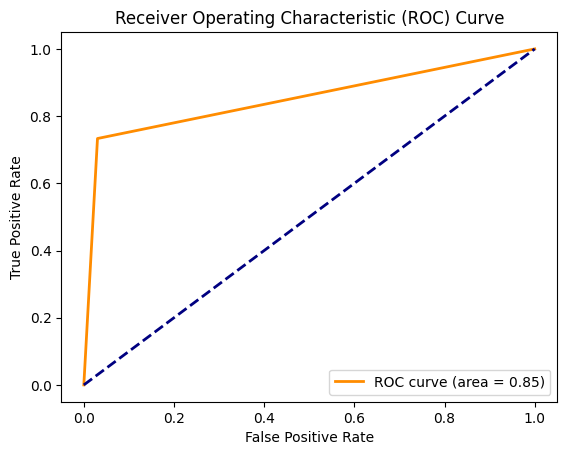


Gradient Boosting:

AUC: 0.9894
Recall: 0.8333
F1 Score: 0.8065


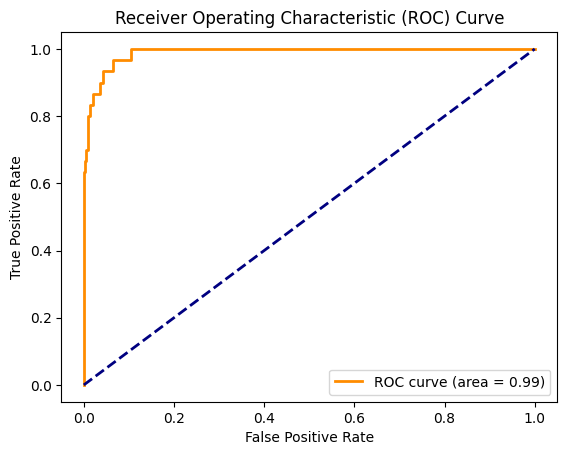

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, roc_curve, auc

# Function to evaluate and print metrics for a given model
def evaluate_model(model_name, y_true, y_pred_prob, y_pred_class):
    # Calculate AUC
    auc_score = roc_auc_score(y_true, y_pred_prob)

    # Calculate Recall
    recall = recall_score(y_true, y_pred_class)

    # Calculate F1 Score
    f1 = f1_score(y_true, y_pred_class)

    print(f"\n{model_name}:\n")
    print(f"AUC: {auc_score:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Logistic Regression
logistic_prob = logistic_model.predict_proba(x_test)[:, 1]
logistic_class = logistic_model.predict(x_test)
evaluate_model("Logistic Regression", y_test_class, logistic_prob, logistic_class)

# Evaluate Decision Tree
tree_prob = tree_model.predict_proba(x_test)[:, 1]
tree_class = tree_model.predict(x_test)
evaluate_model("Decision Tree", y_test_class, tree_prob, tree_class)

# Evaluate Gradient Boosting
gradient_boosting_prob = gradient_boosting_model.predict_proba(x_test)[:, 1]
gradient_boosting_class = gradient_boosting_model.predict(x_test)
evaluate_model("Gradient Boosting", y_test_class, gradient_boosting_prob, gradient_boosting_class)


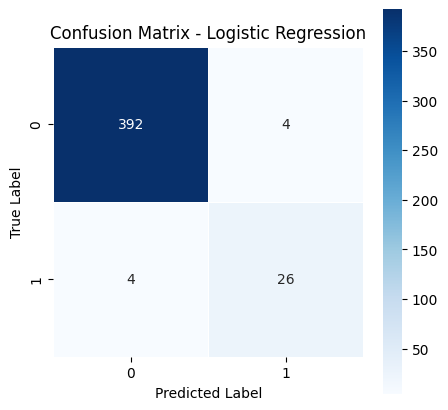

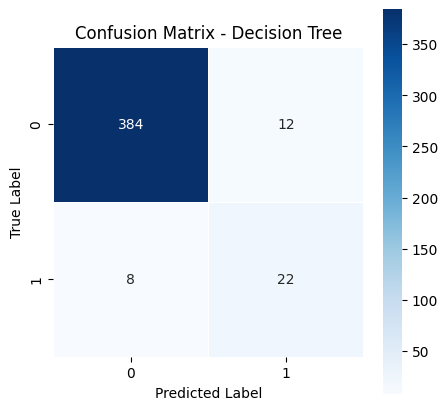

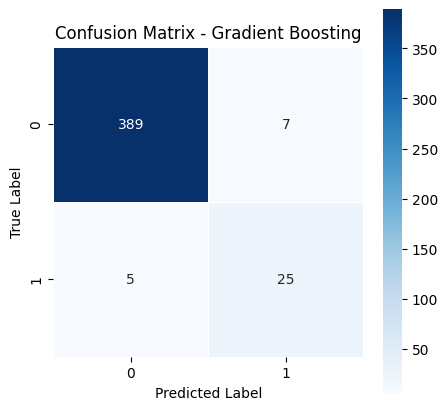

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix("Logistic Regression", y_test_class, logistic_class)

# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix("Decision Tree", y_test_class, tree_class)

# Plot Confusion Matrix for Gradient Boosting
plot_confusion_matrix("Gradient Boosting", y_test_class, gradient_boosting_class)



# part 2 ***continued***

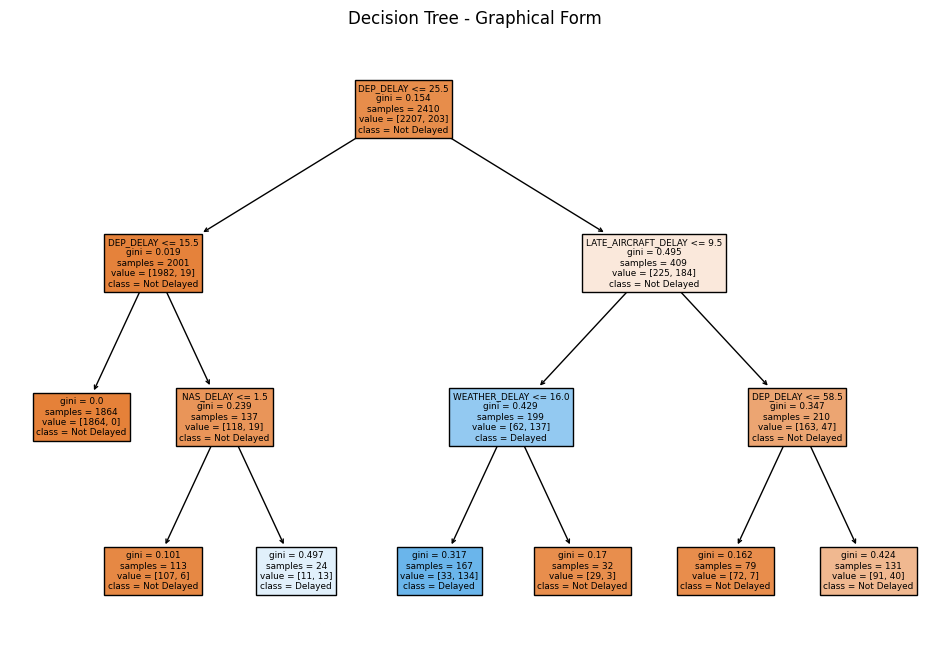

Decision Tree - Text Form:

|--- DEP_DELAY <= 25.50
|   |--- DEP_DELAY <= 15.50
|   |   |--- class: 0
|   |--- DEP_DELAY >  15.50
|   |   |--- NAS_DELAY <= 1.50
|   |   |   |--- class: 0
|   |   |--- NAS_DELAY >  1.50
|   |   |   |--- class: 1
|--- DEP_DELAY >  25.50
|   |--- LATE_AIRCRAFT_DELAY <= 9.50
|   |   |--- WEATHER_DELAY <= 16.00
|   |   |   |--- class: 1
|   |   |--- WEATHER_DELAY >  16.00
|   |   |   |--- class: 0
|   |--- LATE_AIRCRAFT_DELAY >  9.50
|   |   |--- DEP_DELAY <= 58.50
|   |   |   |--- class: 0
|   |   |--- DEP_DELAY >  58.50
|   |   |   |--- class: 0



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=9)
tree_model.fit(x_train, y_train_class)

# Plot Decision Tree graphically
plt.figure(figsize=(12,8))
plot_tree(tree_model, filled=True, feature_names=x_train.columns, class_names=['Not Delayed', 'Delayed'])
plt.title('Decision Tree - Graphical Form')
plt.show()

# Plot Decision Tree in text form
tree_rules = export_text(tree_model, feature_names=list(x_train.columns))
print("Decision Tree - Text Form:\n")
print(tree_rules)


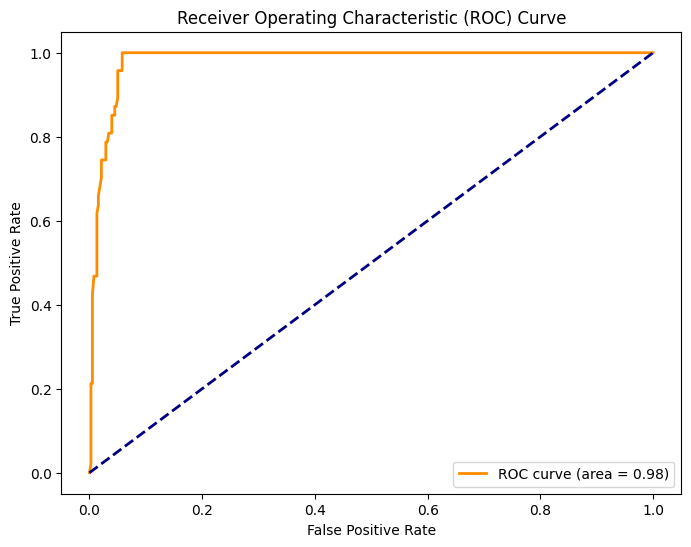

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume you have your features and target variable
X = df.drop(['CARRIER_DELAY'], axis=1)
y = df['CARRIER_DELAY']

# Encode categorical variables
le = LabelEncoder()
X['origin_encoded'] = le.fit_transform(X['ORIGIN'])
X['dest_encoded'] = le.fit_transform(X['DEST'])

# Drop the original categorical columns and other non-numeric columns
X = X.drop(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CANCELLATION_CODE', 'Unnamed: 27', 'CANCELLED', 'OP_CARRIER', 'DIVERTED'], axis=1)

# Binarize the target variable for binary classification
y_bin = (y > 0).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.15, random_state=9)

# Train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=9)
rf_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install interpret


  Using cached interpret_core-0.4.4-py3-none-any.whl (16.9 MB)
  Attempting uninstall: interpret-core
    Found existing installation: interpret-core 0.4.3
    Uninstalling interpret-core-0.4.3:
      Successfully uninstalled interpret-core-0.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
interpret-community 0.30.0 requires interpret-core[required]<=0.4.3,>=0.1.20, but you have interpret-core 0.4.4 which is incompatible.


In [ ]:
from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.perf import ROC

# Use the EBM global explainer
ebm_global_explainer = ExplainableBoostingClassifier(random_state=9)
ebm_global_explainer.fit(X_train, y_train)

# Use the ROC metric for evaluating the explainer
ebm_global_perf = ROC(ebm_global_explainer.predict_proba).explain_perf(X_test, y_test)

# Plot the scope rules
show(ebm_global_perf)
